# Regularization - Lasso & Ridge Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

## Features and Target

In [3]:
X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]

## Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Ridge Regression (L2)

In [6]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)


## Lasso Regression (L1)

In [7]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)

## Evaluation

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} → MSE: {mse:.4f}, R2: {r2:.4f}")

evaluate_model(y_test, ridge_preds, "Ridge Regression")
evaluate_model(y_test, lasso_preds, "Lasso Regression")

Ridge Regression → MSE: 0.5559, R2: 0.5758
Lasso Regression → MSE: 0.6796, R2: 0.4814


## Visualization

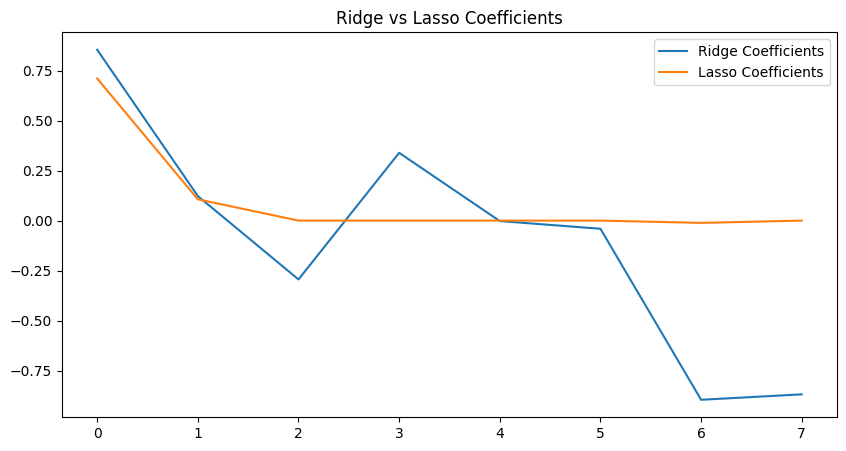

In [9]:
plt.figure(figsize=(10,5))
plt.plot(ridge.coef_, label="Ridge Coefficients")
plt.plot(lasso.coef_, label="Lasso Coefficients")
plt.title("Ridge vs Lasso Coefficients")
plt.legend()
plt.show()